In [1]:
# dataset source
# https://www.kaggle.com/c/si650winter11/data

In [2]:
import keras
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Read the training data
train_df = pd.read_csv('binary_sentiment_analysis_training.txt', sep='\t', names=['sentiment', 'sentence'])

In [4]:
# print training data shape
train_df['int_word_vector'] = None
print(train_df.shape)

(6918, 3)


In [5]:
# print initial rows of data
train_df.head()

,sentiment,sentence,int_word_vector
0,1,The Da Vinci Code book is just awesome.,None
1,1,this was the first clive cussler i've ever rea...,None
2,1,i liked the Da Vinci Code a lot.,None
3,1,i liked the Da Vinci Code a lot.,None
4,1,I liked the Da Vinci Code but it ultimatly did...,None


In [6]:
# Create a unique word index along with updated int_word_vector column

def unique_word_index():
    
    words_list_dict = {}
    i = 1
    regex = re.compile('[^a-z]')

    for index, row in train_df.iterrows():
        int_word_vector = []
        row_string = row['sentence']
        words_list = row_string.lower().split()
        
        for word in words_list:
            refined_word = regex.sub('', word)
            if refined_word not in words_list_dict:
                words_list_dict[refined_word] = i
                i += 1 
            int_word_vector.append(words_list_dict[refined_word])
        
        train_df.at[index, 'int_word_vector'] = int_word_vector
    return words_list_dict

words_list_dict = unique_word_index()
train_df.head()

,sentiment,sentence,int_word_vector
0,1,The Da Vinci Code book is just awesome.,"[1, 2, 3, 4, 5, 6, 7, 8]"
1,1,this was the first clive cussler i've ever rea...,"[9, 10, 1, 11, 12, 13, 14, 15, 16, 17, 18, 19,..."
2,1,i liked the Da Vinci Code a lot.,"[27, 28, 1, 2, 3, 4, 29, 30]"
3,1,i liked the Da Vinci Code a lot.,"[27, 28, 1, 2, 3, 4, 29, 30]"
4,1,I liked the Da Vinci Code but it ultimatly did...,"[27, 28, 1, 2, 3, 4, 17, 31, 32, 33, 34, 35, 3..."


In [7]:
# Final shape of the dataframe
print(train_df.shape)

(6918, 3)


In [8]:
# Data and labels list
data_list = list(train_df['int_word_vector'])
labels_list = list(train_df['sentiment'])

In [9]:
# Vocabulary size of the word list dictionary
max([max(sequence) for sequence in data_list])

2194

In [10]:
# One hot encode the data
def one_hot_encode(input_data, dimension=2195):
    encoded_data = np.zeros((len(input_data), dimension))
    for i, single_row in enumerate(input_data):
        encoded_data[i, single_row] = 1.
    return encoded_data

X_data = one_hot_encode(data_list)

In [11]:
# Sample df record check with one hot encoded list
train_df['int_word_vector'][0], X_data[0][:20]

([1, 2, 3, 4, 5, 6, 7, 8],
 array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]))

In [12]:
# Vectorize labels
y_labels = np.asarray(labels_list).astype('float32')

In [13]:
# Final input dataset shape
X_data.shape, y_labels.shape

((6918, 2195), (6918,))

In [14]:
# Shuffle and split the dataset
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5188, 2195) (1730, 2195) (5188,) (1730,)


In [15]:
# Define the model
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2195,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [16]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Train on 4188 samples, validate on 1000 samples
Epoch 1/20
4188/4188 [==============================] - 1s 198us/step - loss: 0.5647 - binary_accuracy: 0.8940 - val_loss: 0.4204 - val_binary_accuracy: 0.9740
Epoch 2/20
4188/4188 [==============================] - 0s 68us/step - loss: 0.3151 - binary_accuracy: 0.9780 - val_loss: 0.2202 - val_binary_accuracy: 0.9800
Epoch 3/20
4188/4188 [==============================] - 0s 76us/step - loss: 0.1568 - binary_accuracy: 0.9857 - val_loss: 0.1145 - val_binary_accuracy: 0.9830
Epoch 4/20
4188/4188 [==============================] - 0s 82us/step - loss: 0.0762 - binary_accuracy: 0.9921 - val_loss: 0.0642 - val_binary_accuracy: 0.9860
Epoch 5/20
4188/4188 [==============================] - 0s 80us/step - loss: 0.0371 - binary_accuracy: 0.9959 - val_loss: 0.0400 - val_binary_accuracy: 0.9880
Epoch 6/20
4188/4188 [==============================] - 0s 80us/step - loss: 0.0186 - binary_accuracy: 0.9974 - val_loss: 0.0288 - val_binary_accuracy: 0.98

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

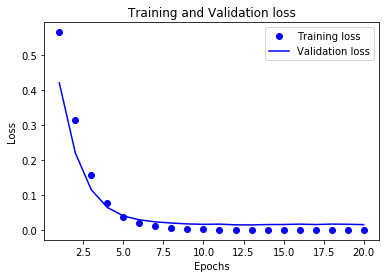

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


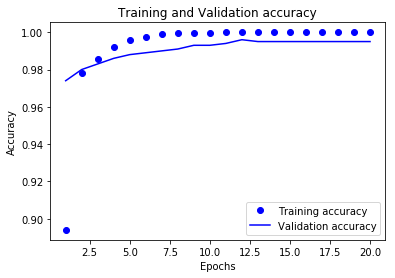

In [20]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2195,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=128)
results = model.evaluate(X_test, y_test)

Epoch 1/15
5188/5188 [==============================] - 1s 136us/step - loss: 0.6262 - acc: 0.7911
Epoch 2/15
5188/5188 [==============================] - 0s 66us/step - loss: 0.4849 - acc: 0.9422
Epoch 3/15
5188/5188 [==============================] - 0s 62us/step - loss: 0.3846 - acc: 0.9678
Epoch 4/15
5188/5188 [==============================] - 0s 61us/step - loss: 0.3011 - acc: 0.9852
Epoch 5/15
5188/5188 [==============================] - 0s 62us/step - loss: 0.2031 - acc: 0.9946
Epoch 6/15
5188/5188 [==============================] - 0s 59us/step - loss: 0.1042 - acc: 0.9977
Epoch 7/15
5188/5188 [==============================] - 0s 61us/step - loss: 0.0465 - acc: 0.9983
Epoch 8/15
5188/5188 [==============================] - 0s 67us/step - loss: 0.0200 - acc: 0.9992
Epoch 9/15
5188/5188 [==============================] - 0s 63us/step - loss: 0.0086 - acc: 0.9994
Epoch 10/15
5188/5188 [==============================] - 0s 66us/step - loss: 0.0038 - acc: 1.0000
Epoch 11/15
5188/5

In [22]:
results

[0.04536266018146435, 0.9901734104046243]

In [23]:
# Conclusion
# 99.01 accuracy on test set limiting to 15 epochs on training set